In [ ]:
!pip install mglearn

     |████████████████████████████████| 540 kB 5.5 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=2d26ac40b2fa21114caabfe3baf48221965520caaf6d824bd8df0a34f835e3aa
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
import matplotlib.pyplot as plt
import mglearn

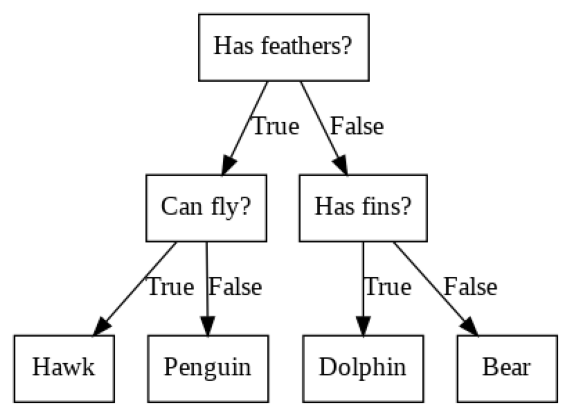

In [ ]:
plt.figure(figsize=(10,10))
mglearn.plots.plot_animal_tree()

In [ ]:
# knn - 회귀, 분류
# 선형 회귀 - 회귀
# 라소회귀(Lasso) , 리지(Ridge)회귀
# 의사결정트리
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import seaborn as sns

In [ ]:
cancer = load_breast_cancer()
all_X = cancer.data
all_Y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(all_X, 
                                                    all_Y,
                                                    stratify=cancer.target,
                                                    test_size=0.3, 
                                                    random_state=42)

model = DecisionTreeClassifier(max_depth=4, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
print("학습용 세트 정확도 : {:3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도 : {:3f}".format(model.score(X_test, y_test)))

학습용 세트 정확도 : 0.992462
테스트 세트 정확도 : 0.923977


In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(model, out_file="tree.dot", 
                class_names=['악성', '양성'],
                feature_names = cancer.feature_names, 
                impurity = False,
                filled=True)       # color 

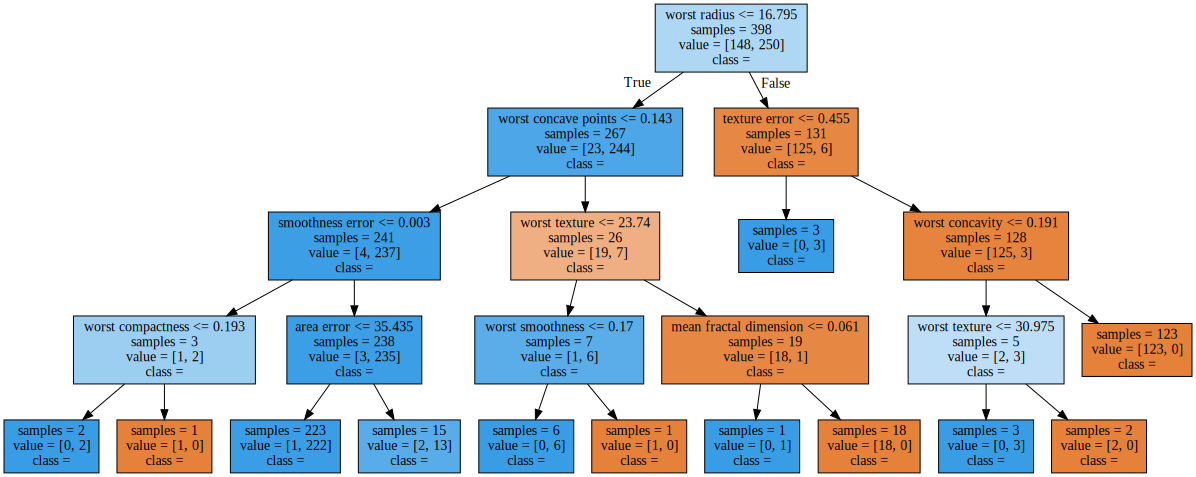

In [ ]:
import graphviz

with open("tree.dot") as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
import numpy as np

In [ ]:
def plot_feature_imp_cancer(model):
    n_features = cancer.data.shape[1]
    imp = model.feature_importances_
    plt.barh(range(n_features) , imp, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

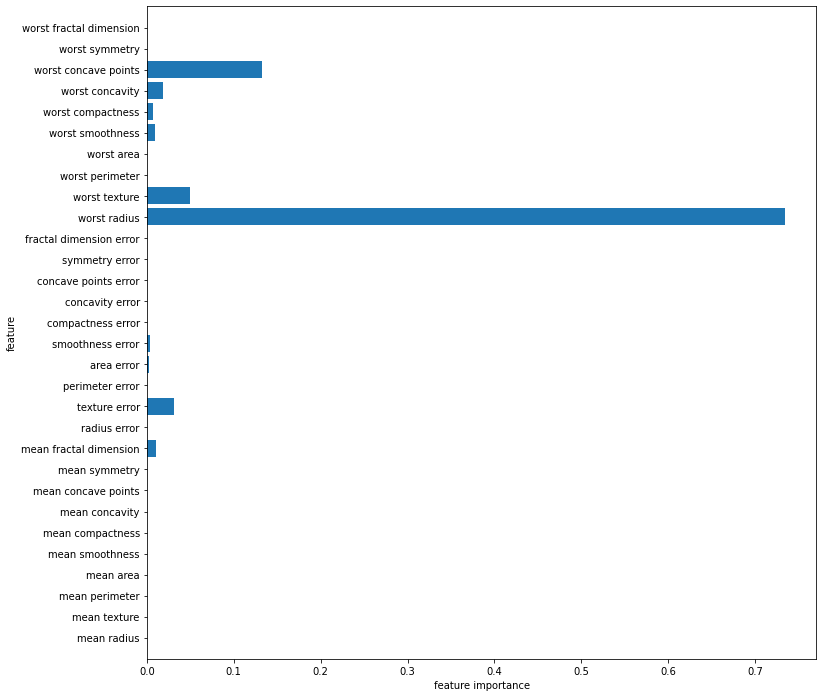

In [ ]:
plt.figure(figsize=(12,12))
plot_feature_imp_cancer(model)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import seaborn as sns

In [ ]:
cancer = load_breast_cancer()
all_X = cancer.data
all_Y = cancer.target

In [ ]:
def testTreeModel(TestSize=0.3):
    cancer = load_breast_cancer()
    all_X = cancer.data
    all_Y = cancer.target
    X_train, X_test, y_train, y_test = train_test_split(all_X, 
                                        all_Y, 
                                        stratify=cancer.target, 
                                        test_size = TestSize,
                                        random_state=77)
    
    tree = DecisionTreeClassifier(random_state=0)
    tree.fit(X_train, y_train)
    print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
    print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

In [ ]:
testTreeModel(0.3)  # 테스트 사이즈 30%
testTreeModel(0.1)  # 테스트 사이즈 10%
testTreeModel(0.2)  # 테스트 사이즈 20%

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.918
훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.912
훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.912


In [ ]:
def testTreeModel(TestSize=0.3, treedepth=3):
    cancer = load_breast_cancer()
    X_train, X_test, y_train, y_test = train_test_split(all_X, 
                                            all_Y, 
                                            stratify=cancer.target, 
                                            test_size = TestSize,
                                            random_state=77)
    tree = DecisionTreeClassifier(max_depth=treedepth, random_state=0)
    tree.fit(X_train, y_train)
    print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
    print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

In [ ]:
for size in range(1,6,1):
  for depth in range(1,8,1):
    print(f"테스트 사이즈 : {size/10}, 트리의 깊이 : {depth}")
    testTreeModel(size/10, depth)

테스트 사이즈 : 0.1, 트리의 깊이 : 1
훈련 세트 정확도 : 0.926
테스트 세트 정확도 : 0.860
테스트 사이즈 : 0.1, 트리의 깊이 : 2
훈련 세트 정확도 : 0.953
테스트 세트 정확도 : 0.877
테스트 사이즈 : 0.1, 트리의 깊이 : 3
훈련 세트 정확도 : 0.971
테스트 세트 정확도 : 0.877
테스트 사이즈 : 0.1, 트리의 깊이 : 4
훈련 세트 정확도 : 0.986
테스트 세트 정확도 : 0.877
테스트 사이즈 : 0.1, 트리의 깊이 : 5
훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.877
테스트 사이즈 : 0.1, 트리의 깊이 : 6
훈련 세트 정확도 : 0.996
테스트 세트 정확도 : 0.895
테스트 사이즈 : 0.1, 트리의 깊이 : 7
훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.912
테스트 사이즈 : 0.2, 트리의 깊이 : 1
훈련 세트 정확도 : 0.930
테스트 세트 정확도 : 0.895
테스트 사이즈 : 0.2, 트리의 깊이 : 2
훈련 세트 정확도 : 0.956
테스트 세트 정확도 : 0.886
테스트 사이즈 : 0.2, 트리의 깊이 : 3
훈련 세트 정확도 : 0.980
테스트 세트 정확도 : 0.895
테스트 사이즈 : 0.2, 트리의 깊이 : 4
훈련 세트 정확도 : 0.987
테스트 세트 정확도 : 0.886
테스트 사이즈 : 0.2, 트리의 깊이 : 5
훈련 세트 정확도 : 0.991
테스트 세트 정확도 : 0.912
테스트 사이즈 : 0.2, 트리의 깊이 : 6
훈련 세트 정확도 : 0.996
테스트 세트 정확도 : 0.895
테스트 사이즈 : 0.2, 트리의 깊이 : 7
훈련 세트 정확도 : 0.998
테스트 세트 정확도 : 0.868
테스트 사이즈 : 0.3, 트리의 깊이 : 1
훈련 세트 정확도 : 0.932
테스트 세트 정확도 : 0.883
테스트 사이즈 : 0.3, 트리의 깊이 : 2
훈련 세트 정확도 : 0.972
테스트 세트 정확도 

In [ ]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(all_X, 
                                             all_Y, 
                                             stratify=cancer.target, 
                                             test_size = 0.4,
                                             random_state=77)
model = DecisionTreeClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.83943396, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.08953231, 0.07103373, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])